# 고객 데이터 분석
- 고객 분류 
- 매출량 예측 모델 생성

## Data Import
- sales: 주문 총 금액 (discount 반영)
- profit: 주문 이익
- 

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/%5BDArt-B%205%EA%B8%B0%5D%20Global_Supermarket.csv')
data.head()

,customer_id,customer_name,customer_segment,order_id,order_city,oreder_region,order_date,order_year,order_weeknum,quantity,...,discount,category,sub_category,market_country,market_area,market_city,ship_date,ship_mode,shipping_cost,row_id
0,LS-172304,Lycoris Saunders,Consumer,CA-2019-130813,Los Angeles,West,2019-01-07,2019,2,3,...,0.0,Office Supplies,Paper,United States,US,California,2019-01-09,Second Class,4.37,36624
1,MV-174854,Mark Van Huff,Consumer,CA-2019-148614,Los Angeles,West,2019-01-21,2019,4,2,...,0.0,Office Supplies,Paper,United States,US,California,2019-01-26,Standard Class,0.94,37033
2,CS-121304,Chad Sievert,Consumer,CA-2019-118962,Los Angeles,West,2019-08-05,2019,32,3,...,0.0,Office Supplies,Paper,United States,US,California,2019-08-09,Standard Class,1.81,31468
3,CS-121304,Chad Sievert,Consumer,CA-2019-118962,Los Angeles,West,2019-08-05,2019,32,2,...,0.0,Office Supplies,Paper,United States,US,California,2019-08-09,Standard Class,4.59,31469
4,AP-109154,Arthur Prichep,Consumer,CA-2019-146969,Los Angeles,West,2019-09-29,2019,40,1,...,0.0,Office Supplies,Paper,United States,US,California,2019-10-03,Standard Class,1.32,32440


In [39]:
data.rename(columns={'oreder_region':'order_region'},inplace=True)
data.columns

Index(['customer_id', 'customer_name', 'customer_segment', 'order_id',
       'order_city', 'order_region', 'order_date', 'order_year',
       'order_weeknum', 'quantity', 'sales', 'product_id', 'product_name',
       'profit', 'discount', 'category', 'sub_category', 'market_country',
       'market_area', 'market_city', 'ship_date', 'ship_mode', 'shipping_cost',
       'row_id'],
      dtype='object')

In [2]:
data.shape

(51290, 24)

## EDA

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

### 1. Customer Information

In [4]:
print('Unique 고객 ID:',data['customer_id'].nunique())
print('Unique 고객 이름:',data['customer_name'].nunique())

Unique 고객 ID: 4873
Unique 고객 이름: 795


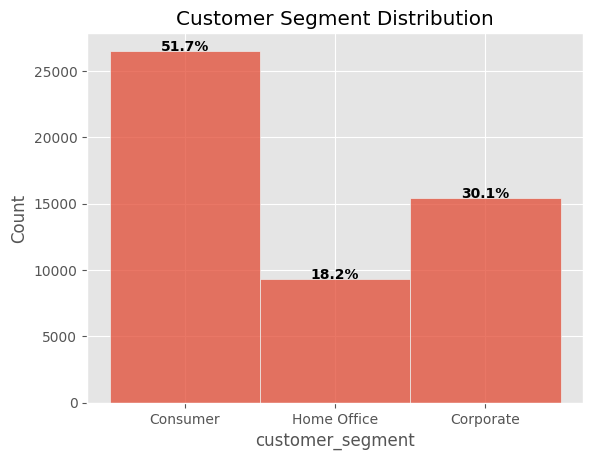

In [5]:
ax = sns.histplot(data['customer_segment'], stat='count')
plt.title('Customer Segment Distribution', loc='center')

# 각 바의 상단 중앙에 비율 표시
total = len(data['customer_segment'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center",weight='bold')

### 2. Order Information

In [6]:
print('Unqiue 주문건수: ',data['order_id'].nunique())

Unqiue 주문건수:  25035


#### 2-1. 지역별 특성
- google map으로 EDA할수도 있을듯

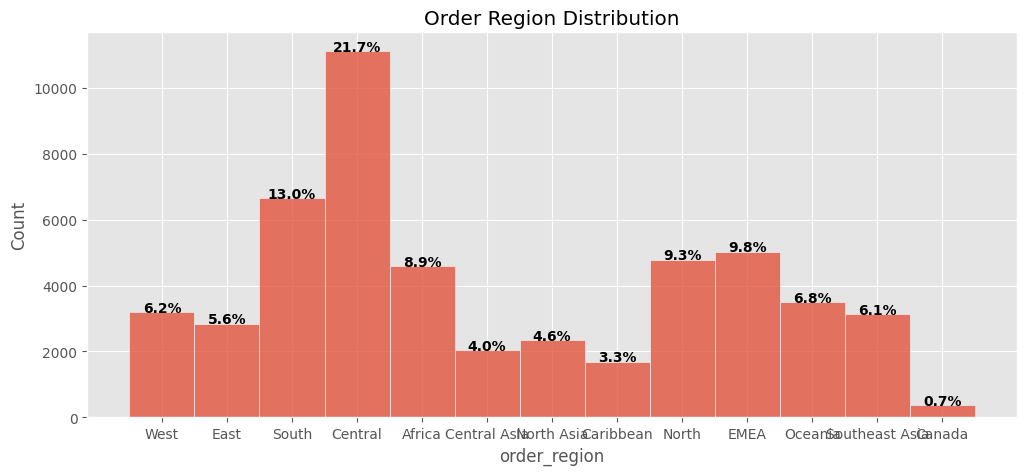

In [50]:
plt.figure(figsize=(12,5))
ax = sns.histplot(data['order_region'], stat='count')
plt.title('Order Region Distribution', loc='center')

# 각 바의 상단 중앙에 비율 표시
total = len(data['order_region'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

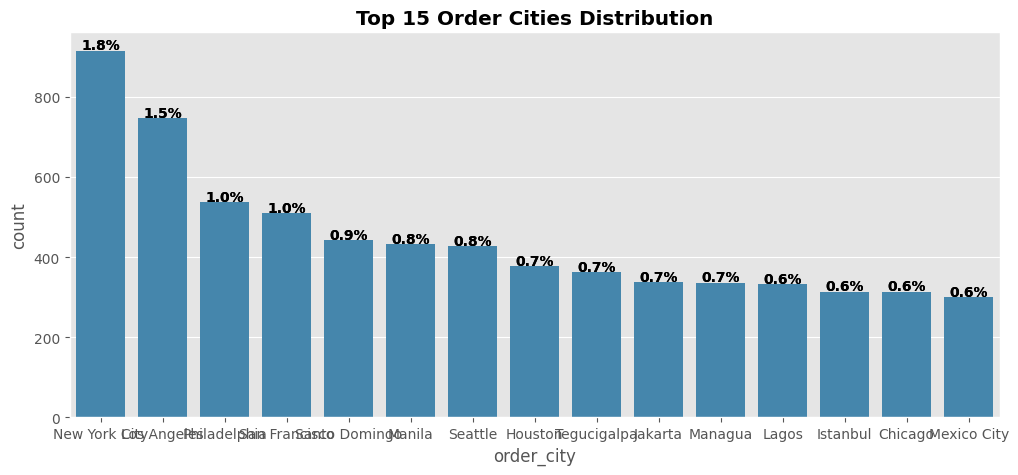

In [21]:
plt.figure(figsize=(12,5))
sns.barplot(data['order_city'].value_counts(ascending=False)[:15])
# 각 바의 상단 중앙에 비율 표시
total_orders = len(data)
ax = sns.barplot(data['order_city'].value_counts(ascending=False)[:15])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_orders:.1%}', ha="center", weight='bold')
plt.title('Top 15 Order Cities Distribution', loc='center',weight='bold')
plt.show()

#### 2-2. 시간적 특성

Text(0.5, 1.0, 'Sales by Timestamps')

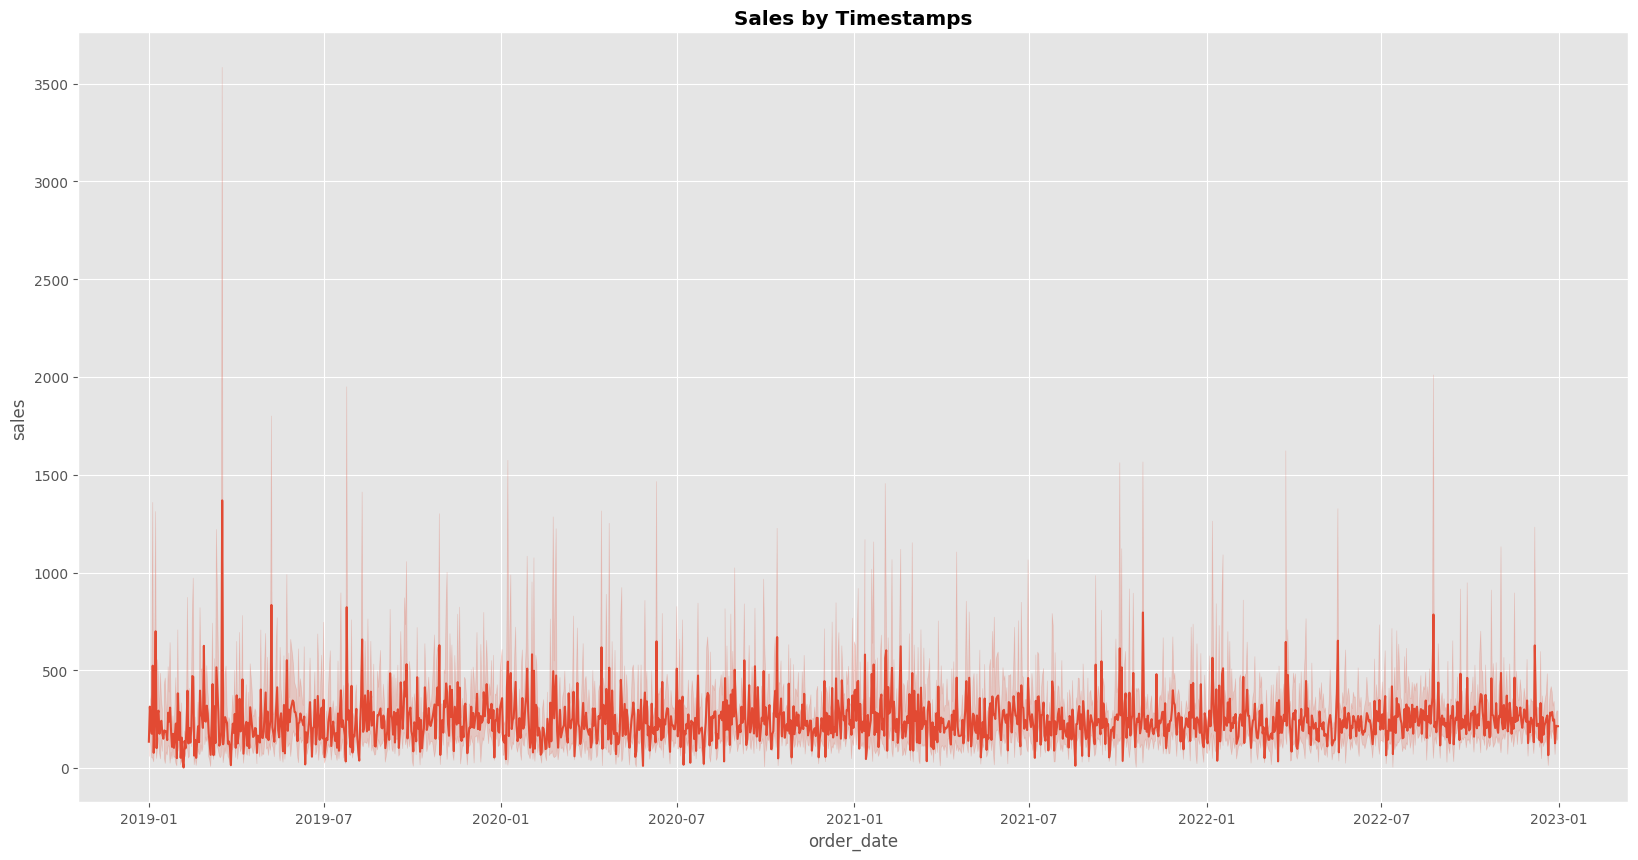

In [72]:
plt.figure(figsize=(20,10))
data['order_date'] = pd.to_datetime(data['order_date'])
sns.lineplot(x=data['order_date'], y=data['sales'])

# 최댓값, 최솟값 y축에 선 그리기
plt.title('Sales by Timestamps', weight='bold', loc='center')

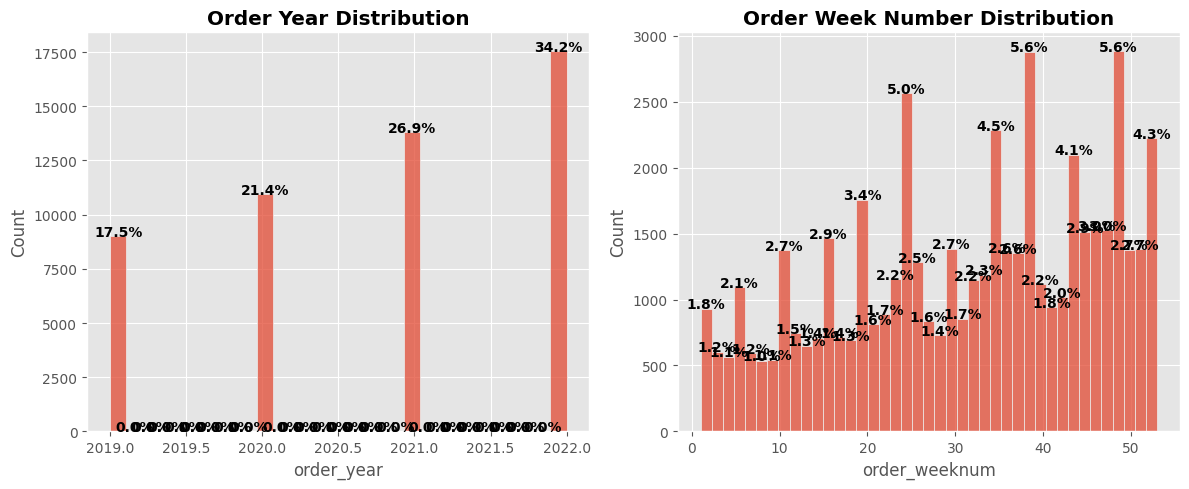

In [77]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

# Plot for 'order_year'
ax = sns.histplot(data['order_year'], stat='count', ax=axes[0])
axes[0].set_title('Order Year Distribution', loc='center', weight='bold')

# 각 바의 상단 중앙에 비율 표시
total = len(data['order_year'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

# Plot for 'order_weeknum'
ax = sns.histplot(data['order_weeknum'], stat='count', ax=axes[1])
axes[1].set_title('Order Week Number Distribution', loc='center', weight='bold')

# 각 바의 상단 중앙에 비율 표시
total = len(data['order_weeknum'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

plt.tight_layout()

#### 2-3. Sales

Text(0.5, 1.0, 'Zoom-In Sales Dist')

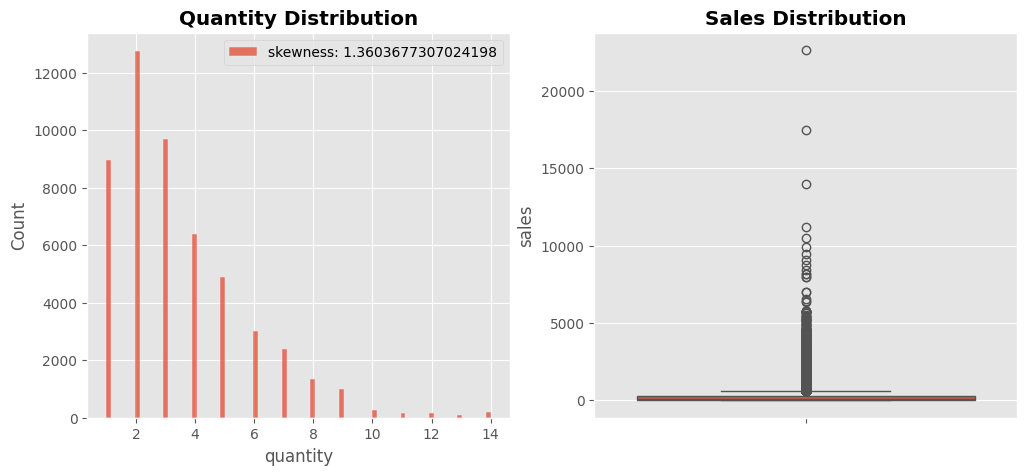

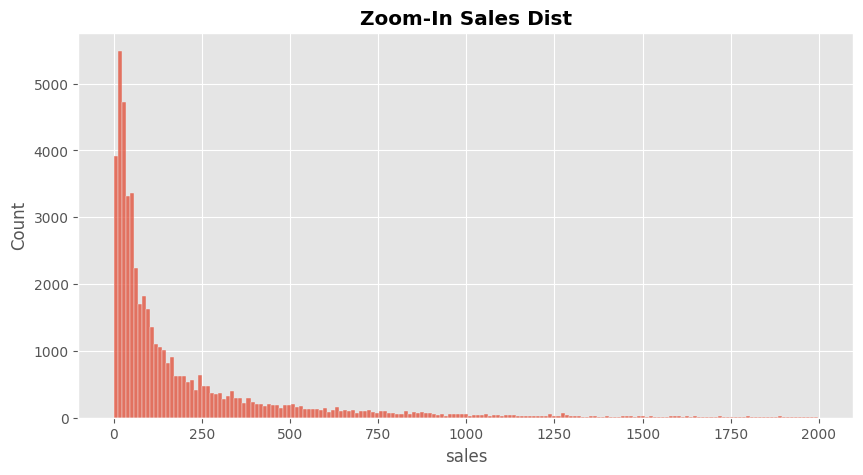

In [141]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax = ax.flatten()

sns.histplot(data['quantity'],ax=ax[0],label= f"skewness: {data['quantity'].skew()}")
ax[0].set_title('Quantity Distribution',weight='bold',loc='center')
ax[0].legend()
sns.boxplot(data['sales'], ax=ax[1])
ax[1].set_title('Sales Distribution', weight = 'bold', loc = 'center')

plt.figure(figsize=(10,5))
sns.histplot(data['sales'].loc[data['sales']<2000])
plt.title('Zoom-In Sales Dist',weight='bold')